# HW5

Tikslas: apskaičiuoti atstumus/panašumus tarp daugiamačių objektų naudojant skirtingus metodus:
- a. Manhattan
- b. Euclidean
- c. Cosine
- d. SMC
- e. Jaccard

Iš savo nagrinėjamų duomenų rinkinio suformuokite panašiausių objektų poaibį tinkamai pritaikydami įvairius atstumų/pamašumų metodus (du atstumų/panašumų skaičiavimo metodus tinkamiausius duomenims).
  - Meaningfully apply appropriate distance/similarity techniques to get the most similar subgroup of objects.
    

Paiiškinkite gautą rezultatą. Ar skirtingais atstumų/panašumų metodais gauti panašiausių objektų poaibiai yra tokie patys?
  - Comment the results. Are subgroups of similar objects obtained using different techniques are composed of the same objects?


Jei paminėti atstumų/panašumų metodai negali būti taikomi jūsų nagrinėjamiems duomenims, naudokite savo duomenims tinkamiausius.
  - For a distance/similarity techniques that cannot be applied to your data, select a test dataset.

In [1]:
import pandas as pd
names=['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price_Tomans', 'Price_USD']
rinkinys = pd.read_csv("rinkinys.csv", names=names, header=0)

In [2]:
rinkinys['Price_Tomans'] = rinkinys.Price_Tomans.astype(float)
rinkinys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          3469 non-null   int64  
 1   Room          3469 non-null   int64  
 2   Parking       3469 non-null   object 
 3   Warehouse     3469 non-null   object 
 4   Elevator      3469 non-null   object 
 5   Address       3446 non-null   object 
 6   Price_Tomans  3469 non-null   float64
 7   Price_USD     3469 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 216.9+ KB


In [3]:
nrinkinys = pd.DataFrame(rinkinys)
nrinkinys.dropna(inplace=True)
nrinkinys.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price_Tomans,Price_USD
0,63,1,Yra,Yra,Yra,Shahran,1.850000e+09,61666.67
1,60,1,Yra,Yra,Yra,Shahran,1.850000e+09,61666.67
2,79,2,Yra,Yra,Yra,Pardis,5.500000e+08,18333.33
3,95,2,Yra,Yra,Yra,Shahrake Qods,9.025000e+08,30083.33
4,123,2,Yra,Yra,Yra,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
nrinkinys2 = nrinkinys.drop_duplicates(subset = ['Address'],keep = 'last').reset_index(drop = True)
nrinkinys2.sort_values("Address", inplace = True) 
    
nrinkinys2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price_Tomans,Price_USD
149,72,2,Yra,Yra,Yra,Abazar,3.350000e+09,111666.67
9,90,2,Yra,Yra,Yra,Abbasabad,4.000000e+09,133333.33
31,500,2,Yra,Yra,Nera,Absard,3.100000e+09,103333.33
96,85,2,Yra,Nera,Yra,Abuzar,2.715000e+09,90500.00
132,66,2,Nera,Yra,Nera,Afsarieh,1.120000e+09,37333.33


In [5]:
nrinkinys2.describe()

,Area,Room,Price_Tomans,Price_USD
count,192.000000,192.000000,1.920000e+02,1.920000e+02
mean,105.067708,2.052083,4.506455e+09,1.502152e+05
std,76.867947,0.804045,8.104299e+09,2.701433e+05
min,37.000000,1.000000,2.500000e+08,8.333330e+03
25%,67.750000,2.000000,1.115000e+09,3.716667e+04
50%,86.000000,2.000000,2.345000e+09,7.816667e+04
75%,115.000000,2.000000,5.325000e+09,1.775000e+05
max,750.000000,5.000000,7.440000e+10,2.480000e+06


In [6]:
import sklearn
from sklearn import preprocessing
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity


naujasr = nrinkinys2.copy(deep=True)
naujasr.drop(nrinkinys2.columns[[2, 3, 4]], axis=1, inplace=True)
naujasr.dropna(inplace=True)

data = naujasr[['Area', 'Room', 'Price_Tomans', 'Price_USD']].to_numpy()
ndata = sklearn.preprocessing.minmax_scale(data, feature_range=(0, 1), axis=0, copy=True)

### Manhattan

In [7]:
manhattan_dist = DistanceMetric.get_metric('manhattan')
manhattan_df = pd.DataFrame(manhattan_dist.pairwise(ndata), columns=naujasr.Address, index=naujasr.Address)
manhattan_df.iloc[:10,:10]

Address,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South
Address,,,,,,,,,,
Abazar,0.000000,0.042777,0.607024,0.035360,0.068563,0.308206,0.052973,1.067419,0.334180,0.068833
Abbasabad,0.042777,0.000000,0.599310,0.041672,0.111341,0.350984,0.095751,1.024642,0.376958,0.108806
Absard,0.607024,0.599310,0.000000,0.592432,0.662101,0.901744,0.646511,1.315397,0.927718,0.659566
Abuzar,0.035360,0.041672,0.592432,0.000000,0.069669,0.309312,0.054079,1.066314,0.335286,0.067134
Afsarieh,0.068563,0.111341,0.662101,0.069669,0.000000,0.260357,0.018395,1.135983,0.265617,0.017100
Ahang,0.308206,0.350984,0.901744,0.309312,0.260357,0.000000,0.263648,1.375625,0.025974,0.271847
Air force,0.052973,0.095751,0.646511,0.054079,0.018395,0.263648,0.000000,1.120393,0.281207,0.035495
Ajudaniye,1.067419,1.024642,1.315397,1.066314,1.135983,1.375625,1.120393,0.000000,1.401600,1.133448
Alborz Complex,0.334180,0.376958,0.927718,0.335286,0.265617,0.025974,0.281207,1.401600,0.000000,0.268152


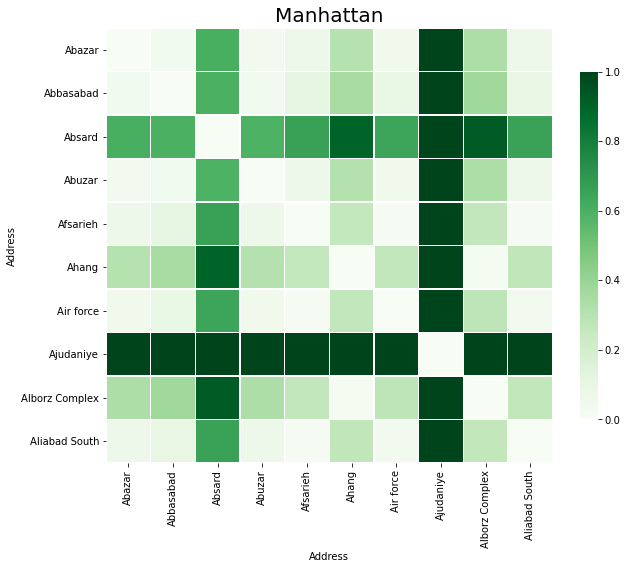

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(manhattan_df.iloc[:10,:10], cmap="Greens", vmin= 0, vmax=1, linewidth=0.3, cbar_kws={"shrink": .8})
plt.title("Manhattan", fontsize =20)
plt.show()

In [9]:
sorted_manhattan_df = manhattan_df.sort_values(by="Abazar")
sorted_manhattan_df.iloc[:10,:10]

Address,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South
Address,,,,,,,,,,
Abazar,0.000000,0.042777,0.607024,0.035360,0.068563,0.308206,0.052973,1.067419,0.334180,0.068833
Darakeh,0.012138,0.054915,0.605675,0.023223,0.056426,0.296069,0.040836,1.079557,0.322043,0.056696
Elm-o-Sanat,0.018233,0.024545,0.588791,0.017127,0.086796,0.326439,0.071206,1.049186,0.352413,0.084261
Shahr-e-Ziba,0.019096,0.050654,0.601413,0.016264,0.060687,0.300330,0.045097,1.075295,0.326304,0.058152
North Program Organization,0.022009,0.042346,0.593106,0.013351,0.068995,0.308637,0.053405,1.066988,0.334612,0.066460
Mehran,0.022225,0.024328,0.623639,0.051975,0.090789,0.330431,0.075199,1.045194,0.356406,0.088254
Darband,0.023034,0.025138,0.624448,0.052784,0.091598,0.331241,0.076008,1.044385,0.357215,0.089063
Southern Janatabad,0.023681,0.019096,0.591434,0.022576,0.092245,0.331887,0.076655,1.043738,0.357862,0.089710
Northren Jamalzadeh,0.024976,0.017802,0.595534,0.023871,0.093539,0.333182,0.077949,1.042443,0.359156,0.091004


### Euclidean

In [10]:
euclidean_dist = DistanceMetric.get_metric('euclidean')
euclidean_df = pd.DataFrame(euclidean_dist.pairwise(ndata), columns=naujasr.Address, index=naujasr.Address)
euclidean_df.iloc[:10, :10]

Address,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South
Address,,,,,,,,,,
Abazar,0.000000,0.028125,0.600299,0.021889,0.043356,0.252813,0.032056,0.546063,0.255514,0.047701
Abbasabad,0.028125,0.000000,0.575291,0.025491,0.064422,0.256731,0.055416,0.527946,0.260623,0.064636
Absard,0.600299,0.575291,0.000000,0.582094,0.609866,0.656243,0.610641,0.668817,0.662288,0.600413
Abuzar,0.021889,0.025491,0.582094,0.000000,0.040441,0.252384,0.033549,0.550493,0.254806,0.039351
Afsarieh,0.043356,0.064422,0.609866,0.040441,0.000000,0.250073,0.012097,0.584341,0.250180,0.011086
Ahang,0.252813,0.256731,0.656243,0.252384,0.250073,0.000000,0.250124,0.722955,0.015454,0.250318
Air force,0.032056,0.055416,0.610641,0.033549,0.012097,0.250124,0.000000,0.574688,0.250891,0.020507
Ajudaniye,0.546063,0.527946,0.668817,0.550493,0.584341,0.722955,0.574688,0.000000,0.734194,0.585636
Alborz Complex,0.255514,0.260623,0.662288,0.254806,0.250180,0.015454,0.250891,0.734194,0.000000,0.250349


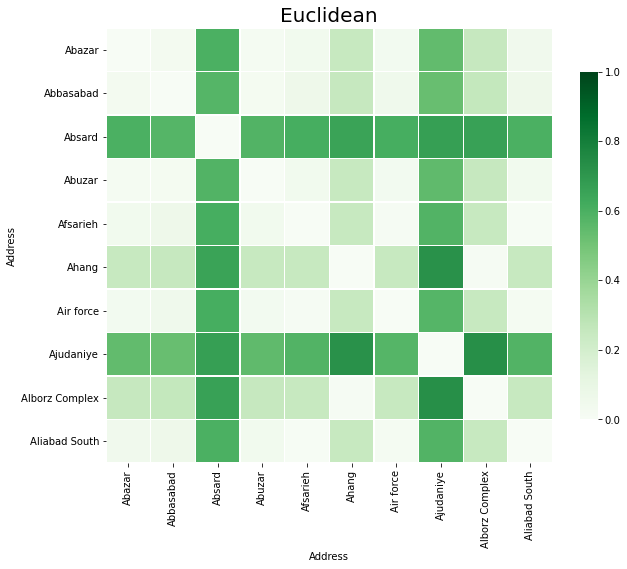

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(euclidean_df.iloc[:10, :10], cmap="Greens", vmin= 0, vmax=1, linewidth=0.3, cbar_kws={"shrink": .8})
plt.title("Euclidean", fontsize =20)
plt.show()

In [12]:
sorted_euclidean_df = euclidean_df.sort_values(by="Abazar")
sorted_euclidean_df.iloc[:10,:10]

Address,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South
Address,,,,,,,,,,
Abazar,0.000000,0.028125,0.600299,0.021889,0.043356,0.252813,0.032056,0.546063,0.255514,0.047701
Darakeh,0.008583,0.032825,0.600293,0.018571,0.034976,0.251694,0.024030,0.553173,0.253920,0.039123
Shahr-e-Ziba,0.011064,0.029438,0.594690,0.012883,0.035852,0.251775,0.026041,0.552173,0.254071,0.038376
North Program Organization,0.013568,0.024449,0.589067,0.008323,0.040047,0.252304,0.031087,0.548837,0.254826,0.041238
Mehran,0.014016,0.022480,0.597762,0.030098,0.057371,0.255272,0.046013,0.533840,0.258774,0.061429
Darband,0.014577,0.022521,0.597780,0.030590,0.057932,0.255387,0.046564,0.533372,0.258919,0.062001
Elm-o-Sanat,0.018233,0.014243,0.582067,0.012111,0.050190,0.253873,0.041449,0.540343,0.256961,0.050564
Water Organization,0.018265,0.033192,0.591976,0.010640,0.031241,0.251270,0.023174,0.556885,0.253253,0.032241
Northren Jamalzadeh,0.018846,0.010362,0.582126,0.016879,0.054289,0.254616,0.045075,0.536369,0.257961,0.055083


### Cosine

In [13]:
cosine = pd.DataFrame(cosine_similarity(ndata), columns=naujasr.Address, index=naujasr.Address)
cosine.iloc[:10,:10]

Address,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South
Address,,,,,,,,,,
Abazar,1.000000,0.994969,0.534610,0.996538,0.986291,0.269388,0.992640,0.848187,0.228187,0.983253
Abbasabad,0.994969,1.000000,0.607434,0.995809,0.971783,0.364511,0.979512,0.879903,0.321174,0.971406
Absard,0.534610,0.607434,1.000000,0.592251,0.506963,0.865759,0.503826,0.575344,0.927708,0.538242
Abuzar,0.996538,0.995809,0.592251,1.000000,0.988406,0.308889,0.992136,0.832858,0.285782,0.988932
Afsarieh,0.986291,0.971783,0.506963,0.988406,1.000000,0.172508,0.998874,0.749884,0.169913,0.999068
Ahang,0.269388,0.364511,0.865759,0.308889,0.172508,1.000000,0.188266,0.578503,0.963548,0.196760
Air force,0.992640,0.979512,0.503826,0.992136,0.998874,0.188266,1.000000,0.777802,0.173152,0.996769
Ajudaniye,0.848187,0.879903,0.575344,0.832858,0.749884,0.578503,0.777802,1.000000,0.431665,0.743554
Alborz Complex,0.228187,0.321174,0.927708,0.285782,0.169913,0.963548,0.173152,0.431665,1.000000,0.202712


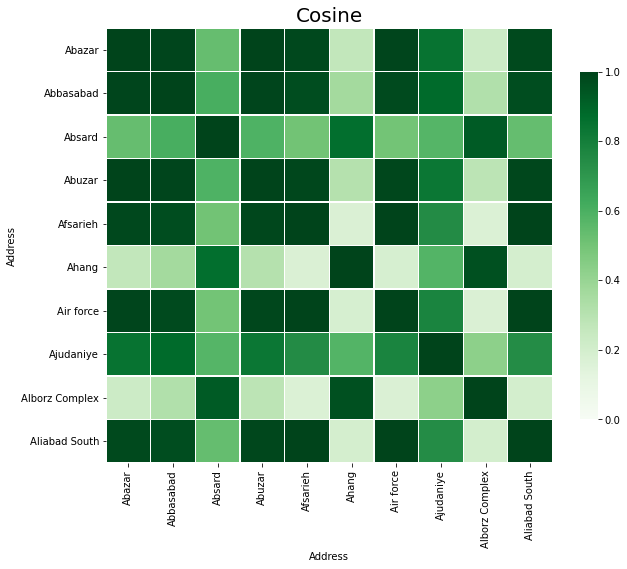

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cosine.iloc[:10,:10], cmap="Greens", vmin= 0, vmax=1, linewidth=0.3, cbar_kws={"shrink": .8})
plt.title("Cosine", fontsize =20)
plt.show()

In [15]:
sorted_cosine = cosine.sort_values(by="Abazar", ascending=False)
sorted_cosine.iloc[:10,:10]

Address,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South
Address,,,,,,,,,,
Abazar,1.000000,0.994969,0.534610,0.996538,0.986291,0.269388,0.992640,0.848187,0.228187,0.983253
Ozgol,0.999964,0.995784,0.541095,0.996884,0.985483,0.277554,0.991939,0.851102,0.236228,0.982678
East Ferdows Boulevard,0.999746,0.993341,0.530974,0.996973,0.989758,0.255920,0.995109,0.836079,0.219806,0.986967
Darakeh,0.999482,0.993147,0.535753,0.997562,0.990987,0.256378,0.995829,0.831607,0.223326,0.988607
Dehkade Olampic,0.999463,0.996675,0.560331,0.998667,0.986858,0.290521,0.992444,0.846438,0.255186,0.985226
Shahr-e-Ziba,0.999108,0.994531,0.553569,0.998835,0.990641,0.273026,0.995163,0.832694,0.242919,0.989152
Mehran,0.998699,0.996650,0.540461,0.993558,0.976595,0.298080,0.985215,0.873885,0.245223,0.972937
North Program Organization,0.998662,0.996257,0.570654,0.999504,0.988491,0.293730,0.993198,0.839073,0.263833,0.987665
Sattarkhan,0.998659,0.995193,0.564494,0.999387,0.990138,0.283485,0.994483,0.833414,0.255101,0.989195


### Iš vizualizacijų matoma, jog Euclidian ir Manhattan atstumai panašiausiai išsidėstę, nepaisant vertės.
### Iš tolimesnių rezultatų matoma, jog išrikiavus Adresus pagal apskaičiuotus rezultatus, atstumai nesutampa.